In [ ]:
s_in_m = 60
s_in_h = 60 * s_in_m
s_in_d = 24 * s_in_h
s_in_w = 7 * s_in_d
print ('В одной недели содержиться', s_in_w, 'секунд')

In [ ]:
total_days = 7 * 3
total_days // 4 * 2
min(total_days % 4, 2)
total_hours = 12 * (total_days // 4 * 2 + min (total_days % 4, 2))
print (total_hours, 'Ч')

In [ ]:
def time_metric_up (time, metric):
    if metric == 'h':
        x = 24
    elif metric == 'd':
        x = 7
    else:
        x = 60
    return time // x, time % x

s = int (input ('Введите к-во секунд: '))

m, s = time_metric_up(s, 's')
h, m = time_metric_up(m, 'm')
d, h = time_metric_up(h, 'h')
w, d = time_metric_up(d, 'd')
print('недель:', w)
print('дней:', d)
print('часов:', h)
print('минут:', m)
print('секунд:', s)


In [1]:
def time_metric_down (time, metric, metric_down):
    if (metric == 'w' and metric_down == 's'):
        x = 7 * 24 * 60 * 60
    elif (metric == 'w' and metric_down == 'm'):
        x = 7 * 24 * 60
    elif (metric == 'w' and metric_down == 'h'):
        x = 7 * 24
    elif (metric == 'w' and metric_down == 'd'):
        x = 7
    elif (metric == 'd' and metric_down == 's'):
        x = 24 * 60 * 60
    elif (metric == 'd' and metric_down == 'm'):
        x = 24 * 60
    elif (metric == 'd' and metric_down == 'h'):
        x = 24
    elif (metric == 'h' and metric_down == 's'):
        x = 60 * 60
    elif (metric == 'h' and metric_down == 'm'):
        x = 60
    elif (metric == 'm' and metric_down == 's'):
        x = 60
    else:
        x = 1
    return time * x

if (time_metric_down(10, 'h', 's') == 36000 and time_metric_down(1, 'w', 'd') == 7 and 
    time_metric_down(1, 'w', 'h') == 168 and time_metric_down(1, 'w', 'm') == 10080 and 
    time_metric_down(1, 'w', 's') == 604800):
    print('Ошибки не выявлены')
else:
    print('Выявлены ошибки')

Ошибки не выявлены


In [8]:
%%timeit
s = [j**2 for j in range (1, 1000001)]

285 ms ± 742 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


f1 - 91.58%
f2 - 99.38%
f3 - 22.13%
f4 - 82.71%
f5 - 38.31%
f6 - 100.0%
f7 - 49.16%


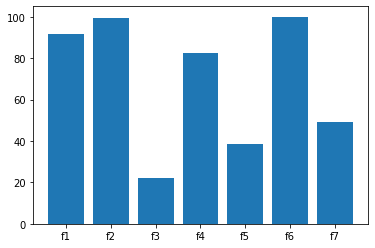

Равны ли результаты между собой?
True

Что находится в первых 20 элементах списка?
[1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400]

Выведем квадраты чисел от 1 до 9:
Число Квадрат
1     1
2     4
3     9
4     16
5     25
6     36
7     49
8     64
9     81


In [1]:
import math
from timeit import timeit
import numpy as np
import matplotlib.pyplot as plt


def f1():                        # Функция с циклом for
    s_for = []                   # Формирование пустого списка. Список - изменяемый тип данных, предназначенный для
                                 # хранения объектов произвольных типов
    for j in range(1, 1000001):  # Для переменной j, изменяющейся последовательно от 1 до 1 млн, выполнить
        s_for.append(j**2)       # Записать в список последним элементом значение квадрата переменной j
    return s_for
        
def f2():                        # Функция с циклом while
    s_while=[]
    j = 1                        # Присвоить переменной j значение 1
    while j <= 1000000:          # Пока j не превышает 1 млн, выполнять
        s_while.append(j**2)
        j += 1                   # Увеличить переменную j на единицу
    return s_while
        
def f3():                        # Функция с генератором и умножением
    s = [j*j for j in range(1, 1000001)]
    return s
    
def f4():                        # Функция с генератором и возведением в степень
    s = [j**2 for j in range(1, 1000001)]
    return s
    
def xx(x):                       # Дополнительная функция, умножающая полученное число само на себя
    return x*x

def x2(x):                       # Дополнительная функция, возводящая в квадрат полученное число
    return x**2
    
def f5():                        # Функция с генератором и умножением с помощью функции
    s = [xx(j) for j in range(1, 1000001)]
    return s
    
def f6():                        # Функция с генератором и возведением в степень с помощью функции
    s = [x2(j) for j in range(1, 1000001)]
    return s
    
def f7():                        # Функция с генератором и возведением в степень с помощью функции pow() библиотеки math
    s = [math.pow(j,2) for j in range(1, 1000001)]
    return s



func = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7']  # Создание списка имен функций
time = []                                          # Создание пустого списка времени выполнения функций
# Далее код, который в цикле запускает функции, определяет время их выполнения 100 раз
# и записывает результат в список time
if __name__ == '__main__':
    for j in func:
        time.append(timeit(j+'()', setup = 'from __main__ import '+j, number = 100))

time = np.array(time)                              # Перевод списка в массив numpy, для удобства вычислений
time = time*100/time.max()                         # Определение процента скорости (максимум = 100%)

for i, j in zip(func, time):
    print(i, '-', str(round(j,2))+'%')

plt.bar(func, time)
plt.show()

s = f3()                     # Сохраним решение самой быстрой функции f3() в переменную s
print('Равны ли результаты между собой?')
print(f1() == f2() == s == f4() == f5() == f6() == f7()) # Равны ли списки между собой?
print()
print('Что находится в первых 20 элементах списка?')
print(s[:20])                # Срез списка показывает первые 20 элементов
print()
print('Выведем квадраты чисел от 1 до 9:')
print('Число Квадрат')
for j in range(9):           # В цикле выведем первые 9 элементов списка (j изменяется от 0 до 8)
    print(j+1,'   ', s[j])   # Нумерация элементов списка начинается с нуля, поэтому, чтобы показать квадрат какого
                             # числа выводится, мы записываем j+1, а адрес в списке просто j. Можно 
                             # интерпритировать так: Квадрат числа j+1 записан в списке s под номером j

In [26]:
from timeit import timeit


def factorial1(n):
    if n == 0:
        return 1
    if n > 1:
        n = n * factorial1(n - 1)
    return n

def factorial2(n):
    if n == 0:
        return 1
    x = n
    while n > 1:
        n -= 1
        x = x * n
    return x

def factorial3(n):
    return math.factorial(n)

%time
n = factorial1(1000)

%time
n = factorial2(1000)

%time
n = factorial3(1000)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 6.91 µs
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.15 µs


In [6]:
import math
import numpy as np
from timeit import timeit

%time
def factorial1(n):
    if n == 0:
        return 1
    if n > 1:
        n = n * factorial1(n - 1)
    return n

def factorial2(n):
    if n == 0:
        return 1
    x = n
    while n > 1:
        n -= 1
        x = x * n
    return x

def factorial3(n):
    return math.factorial(n)

n = 1000
func = ['factorial1', 'factorial2', 'factorial3']
time = []

if __name__ == '__main__':
    print (timeit('factorial1', setup = 'from __main__ import factorial1'))
    print (timeit('factorial2', setup = 'from __main__ import factorial2'))
    print (timeit('factorial3', setup = 'from __main__ import factorial3'))

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 4.05 µs
0.009188773998175748
0.009276960001443513
0.009018073993502185
